# My Linear Regression vs Sk-learn Linear Regression with Random Data

In this notebook I will test the linear regression algorithm I made from scratch vs the Sk-learn Linear Regression, the notebook has the following sections:
1. Create the Random Data
2. Create my LR Model
3. Creathe the Sk-learn LR model
5. Compare the results

In [1]:
# My Linear Regression Model
from linear_regression import myLinearRegression
# Utilities from Sk-learn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
# Numpy for math computations
import numpy as np
np.set_printoptions(precision=5)
# Print like tabular data
from tabulate import tabulate
# Plot the data
import matplotlib.pyplot as plt

## 1. Create the Random Data 

In [2]:
np.random.seed(42)
X = np.random.randn(100).reshape(-1,1)
weights = np.random.rand()

intercept = np.random.randn()
noise = (np.random.randn(100) * 0.1).reshape(-1,1)  # Noise with std of 0.1
y = np.dot(X, weights) + intercept + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80, 1), (20, 1))

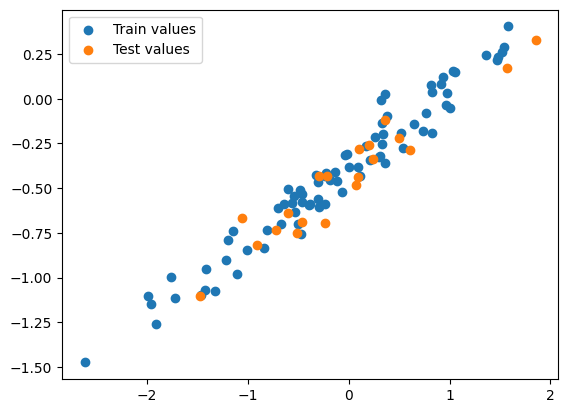

In [3]:
plt.scatter(X_train, y_train, label='Train values')
plt.scatter(X_test, y_test, label='Test values')

plt.legend()
plt.show()

## 2. Create my LR model and fit it

In [4]:
model = myLinearRegression()
model.fit(X_train, y_train)

Converged at epoch 337


In [5]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [6]:
if isinstance(weights, float):
    weights = [weights]
weights

[0.417411003148779]

In [7]:
weights_table = {
    'Weight': [f'w{i+1}' for i in range(len(weights))],
    'Real weights': weights, 
    'Learned Weights': model.weights,
    'Absolute difference': np.abs(weights - model.weights.reshape(-1))
    }

print(tabulate(
    weights_table, 
    headers=['Weight', 'Real weights', 'Learned Weights', 'Absolute Difference'], 
    tablefmt="rounded_grid")
    )

╭──────────┬────────────────┬───────────────────┬───────────────────────╮
│ Weight   │   Real weights │   Learned Weights │   Absolute Difference │
├──────────┼────────────────┼───────────────────┼───────────────────────┤
│ w1       │       0.417411 │          0.433064 │             0.0156528 │
╰──────────┴────────────────┴───────────────────┴───────────────────────╯


In [8]:
print(f'The intercept is: {model.intercept:.4f}')
print(f'The Mse is {mse:.4f}')

The intercept is: -0.3716
The Mse is 0.0122


###  Create the Sk-learn LR model 

In [9]:
from sklearn.linear_model import SGDRegressor

sklearn_model = SGDRegressor()
sklearn_model.fit(X_train, y_train)
y_pred = sklearn_model.predict(X_test)
sk_mse = mean_squared_error(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Compare both models

In [10]:
weights_table = {
    'Weight': [f'w{i+1}' for i in range(len(weights))],
    'Scratch Model weights': weights, 
    'Sk-learn weights': sklearn_model.coef_,
    'Absolute difference': np.abs(weights - sklearn_model.coef_)
    }

print(tabulate(
    weights_table, 
    headers=['Weight', 'Scratch Model weights', 'Sk-learn Weights', 'Absolute Difference'], 
    tablefmt="rounded_grid")
    )

╭──────────┬─────────────────────────┬────────────────────┬───────────────────────╮
│ Weight   │   Scratch Model weights │   Sk-learn Weights │   Absolute Difference │
├──────────┼─────────────────────────┼────────────────────┼───────────────────────┤
│ w1       │                0.417411 │           0.395929 │             0.0214821 │
╰──────────┴─────────────────────────┴────────────────────┴───────────────────────╯


In [11]:
print(tabulate(
    [[model.intercept, sklearn_model.intercept_, abs(model.intercept - sklearn_model.intercept_)]], 
    headers=['Scratch Model intercept', 'Sk-learn intercept', 'Absolute Difference'], 
    tablefmt="rounded_grid")
    )

╭───────────────────────────┬──────────────────────┬───────────────────────╮
│   Scratch Model intercept │   Sk-learn intercept │   Absolute Difference │
├───────────────────────────┼──────────────────────┼───────────────────────┤
│                 -0.371647 │            -0.359131 │             0.0125162 │
╰───────────────────────────┴──────────────────────┴───────────────────────╯


In [12]:
print(tabulate(
    [[mse, sk_mse, abs(mse - sk_mse)]], 
    headers=['Scratch Model MSE', 'Sk-learn MSE', 'Absolute Difference'], 
    tablefmt="rounded_grid")
    )

╭─────────────────────┬────────────────┬───────────────────────╮
│   Scratch Model MSE │   Sk-learn MSE │   Absolute Difference │
├─────────────────────┼────────────────┼───────────────────────┤
│           0.0122203 │      0.0133712 │            0.00115095 │
╰─────────────────────┴────────────────┴───────────────────────╯


In [13]:
model.weights, model.intercept

(array([[0.43306]]), -0.3716472148986002)

In [14]:
sklearn_model.coef_, sklearn_model.intercept_

(array([0.39593]), array([-0.35913]))

### Plot the Regression

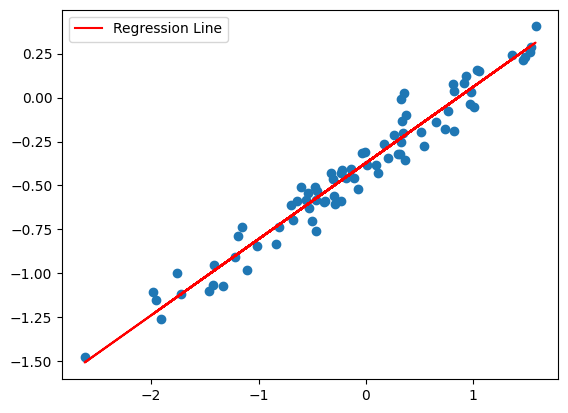

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red', label="Regression Line")
    
plt.legend()
plt.show()